Link to assignment from episode 4:
- .ipynb https://github.com/colabLearn/PandasDFrameVideoScripts/blob/8402456a32334b49f69829f3c23cd87bee72ab2f/Pandas_Series/Ep_5/Pre_/Ep4_Assign_.ipynb
- .py
https://github.com/colabLearn/PandasDFrameVideoScripts/blob/8402456a32334b49f69829f3c23cd87bee72ab2f/Pandas_Series/Ep_5/Pre_/Ep4_Assign_.py

In [1]:
import pandas as pd

In [2]:
# Assign GitHub link to data source variable
# Ensure to change 'blob' in the link to 'raw'
gitRepo ='https://github.com/colabLearn/PandasDFrameVideoScripts/raw/8402456a32334b49f69829f3c23cd87bee72ab2f/testData/global_air_quality_data_10000.csv'

In [3]:
# Extract student data from the CSV file using the PyArrow engine for efficient datatype handling
global_air_quality = pd.read_csv(gitRepo, dtype_backend="pyarrow", engine="pyarrow")

In [4]:
print(global_air_quality.head())

             City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71   3.4   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16   119.7  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04    55.2   36.62  76.85  21.85   2.0   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29      29.3       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16  


In [5]:
cities = global_air_quality.City

In [6]:
cities

0              Bangkok
1             Istanbul
2       Rio de Janeiro
3               Mumbai
4                Paris
             ...      
9995      Johannesburg
9996            Berlin
9997            Moscow
9998            Berlin
9999           Bangkok
Name: City, Length: 10000, dtype: string[pyarrow]

.apply() 

In [7]:
interested_in = ['London','New York', 'Johannesburg', 'Cairo']

In [8]:
def extract_city(val):
    if val in interested_in:
        return val
    else:
        return 'others'

In [9]:
%%timeit
cities.apply(extract_city)

2.18 ms ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
cities.where(cities.isin(interested_in), 'others')

850 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


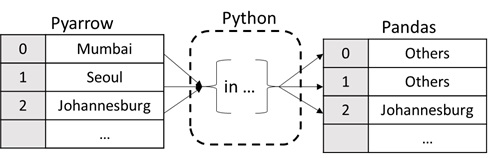

In [11]:
from IPython.display import Image
Image(filename='Pre_//images//apply_.jpg')

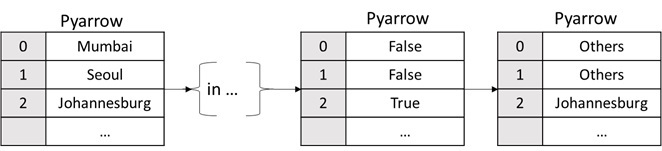

In [12]:
Image(filename='Pre_//images//where_.jpg')

In [13]:
cities.mask(~cities.isin(interested_in), 'others')

0             others
1             others
2             others
3             others
4             others
            ...     
9995    Johannesburg
9996          others
9997          others
9998          others
9999          others
Name: City, Length: 10000, dtype: string[pyarrow]

In [14]:
first_choices = ['London','New York', 'Johannesburg', 'Cairo']
second_choices = ['Toronto', 'Los Angeles', 'Tokyo', 'Beijing']

In [15]:
def extract_city_2(val):
    if val in first_choices:
        return val
    elif val in second_choices:
        return "Second Priority"
    else:
        return 'others'

In [16]:

cities.apply(extract_city_2)

0             others
1             others
2             others
3             others
4             others
            ...     
9995    Johannesburg
9996          others
9997          others
9998          others
9999          others
Name: City, Length: 10000, dtype: object

In [17]:
%%timeit
(cities.case_when(
    caselist = [
        (cities.isin(second_choices), 'Second Priority'),
        (~cities.isin(first_choices), 'other'),
    ]
)
)

2.23 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Missing Data

In [18]:
print(global_air_quality.head())

             City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71   3.4   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16   119.7  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04    55.2   36.62  76.85  21.85   2.0   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29      29.3       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16  


In [19]:
re_global_air_quality = global_air_quality.pivot_table(index = 'Date',
                                                       columns='City',
                                                       values = 'NO2',
                                                       aggfunc='mean'
                                                      )                                                    

In [20]:
re_global_air_quality

City,Bangkok,Beijing,Berlin,Cairo,Dubai,Istanbul,Johannesburg,London,Los Angeles,Madrid,Mexico City,Moscow,Mumbai,New York,Paris,Rio de Janeiro,Seoul,Sydney,Tokyo,Toronto
Date,,,,,,,,,,,,,,,,,,,,
2023-01-01,35.41,<NA>,<NA>,36.735,<NA>,52.105,95.24,82.56,<NA>,40.19,45.46,93.16,76.69,<NA>,55.04,49.43,<NA>,<NA>,<NA>,73.02
2023-01-02,85.305,53.39,<NA>,31.756667,<NA>,58.673333,65.895,42.7,50.013333,28.073333,38.455,20.5,68.08,27.92,<NA>,6.42,84.76,33.82,18.41,70.55
2023-01-03,47.016667,82.44,86.34,65.115,58.865,6.22,<NA>,29.34,36.36,63.13,<NA>,<NA>,<NA>,53.326667,23.85,39.066667,48.455,61.95,69.29,<NA>
2023-01-04,28.33,55.07,<NA>,25.7,51.49,38.51,41.676667,<NA>,79.35,57.083333,<NA>,74.326667,36.375,24.475,<NA>,38.485,53.74,43.475,47.09,<NA>
2023-01-05,37.28,22.1,<NA>,32.13,30.69,57.29,76.87,49.865,86.17,56.4325,18.005,<NA>,40.77,57.72,43.285,<NA>,39.44,67.29,<NA>,35.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-24,52.236667,22.9075,82.18,45.645,41.145,82.04,<NA>,78.645,59.588,78.24,<NA>,10.34,<NA>,<NA>,24.62,10.53,<NA>,42.386667,42.945,49.086
2023-12-25,<NA>,<NA>,46.98,60.535,43.033333,39.365,<NA>,48.82,21.72,63.655,<NA>,36.075,89.22,70.783333,<NA>,39.04,49.763333,87.45,63.043333,<NA>
2023-12-26,53.6375,43.6475,36.07,24.68,84.2,<NA>,<NA>,<NA>,41.355,55.3,94.04,96.31,50.84,64.25,<NA>,81.96,43.57,46.18,68.455,<NA>


In [21]:
re_global_air_quality['New York'].isna().sum()

85

In [22]:
testData1 = re_global_air_quality['New York'].fillna(1)

In [23]:
testData1.isna().sum()

0

In [24]:
testData2 =re_global_air_quality['New York'].dropna()

In [25]:
testData2.size

251

In [26]:
re_global_air_quality['New York'].size

336

In [27]:
testData4 = pd.Series([23,21,19,None,None, 27, 29])

In [28]:
testData4.ffill()

0    23.0
1    21.0
2    19.0
3    19.0
4    19.0
5    27.0
6    29.0
dtype: float64

In [29]:
re_global_air_quality['New York'].ffill().isna().sum()

1

In [30]:
re_global_air_quality['New York'].interpolate()

Date
2023-01-01         <NA>
2023-01-02        27.92
2023-01-03    53.326667
2023-01-04       24.475
2023-01-05        57.72
                ...    
2023-12-24    70.366667
2023-12-25    70.783333
2023-12-26        64.25
2023-12-27       57.045
2023-12-28         9.85
Name: New York, Length: 336, dtype: double[pyarrow]

.clip()

Part 1 Ends here:
In this session, we explored several key functions that help with data manipulation and analysis in Series. So far, we have covered the following:

- The .apply() function
- The .where() function
- The .mask() function
- The .case_when() function
- Additionally, we looked at handling missing data using these methods:
- Getting an overview of missing data with .isna().sum()
- Filling missing values with .fillna(value)
- Dropping missing data with .dropna()
- Interpolating missing data with .interpolate()

In [31]:
for col in re_global_air_quality.columns:
    print(re_global_air_quality[col].astype('float').skew(), col)
    

0.00831354143221299 Bangkok
-0.08211921869981859 Beijing
-0.12295851460663304 Berlin
0.147858346080804 Cairo
-0.09448538998564548 Dubai
-0.032948767068706336 Istanbul
-0.07225449602636173 Johannesburg
-0.08122096070092279 London
0.01626645689499212 Los Angeles
-0.02092443756366995 Madrid
0.026465640560031183 Mexico City
-0.14043860055505872 Moscow
-0.16051918416550864 Mumbai
0.0821144044267552 New York
-0.15217247097070696 Paris
-0.0534886575538337 Rio de Janeiro
-0.026504120162772676 Seoul
-0.08672788756287182 Sydney
-0.08671630473000638 Tokyo
0.041684204784119765 Toronto


In [32]:
testData5 = pd.Series([23, 31, 19, 24, 18, 32,27, 76, 19,21, 15])

In [33]:
testData5.skew()

2.7388586269355315

In [34]:
lower = testData5.quantile(0.05)
upper = testData5.quantile(0.95)

In [35]:
testData5.clip(lower=lower,
               upper=upper
              )

0     23.0
1     31.0
2     19.0
3     24.0
4     18.0
5     32.0
6     27.0
7     54.0
8     19.0
9     21.0
10    16.5
dtype: float64

.sort_values() and .sort_index()

In [36]:
testData5.sort_values().sort_index()

0     23
1     31
2     19
3     24
4     18
5     32
6     27
7     76
8     19
9     21
10    15
dtype: int64

.drop_duplicates()

In [37]:
testData6 = pd.Series([23, 15, 31, 19, 24, 18,23, 32,27, 76, 19,21, 15])

In [38]:
testData6.drop_duplicates(keep=False)

2     31
4     24
5     18
7     32
8     27
9     76
11    21
dtype: int64

.rank() 

In [39]:
 testData7 = pd.Series([40, 20,20,10,20, 30, 10])

In [40]:
 testData7

0    40
1    20
2    20
3    10
4    20
5    30
6    10
dtype: int64

In [41]:
 testData7.rank()

0    7.0
1    4.0
2    4.0
3    1.5
4    4.0
5    6.0
6    1.5
dtype: float64

How it works:
- The method compares the values in each column (or row, if specified) and assigns a rank to each value.
- By default, ranks are assigned in ascending order (smallest value gets rank 1).
- Ties (i.e., if two or more values are the same) are assigned the average rank by default.

In [42]:
 testData7.rank(method='min')

0    7.0
1    3.0
2    3.0
3    1.0
4    3.0
5    6.0
6    1.0
dtype: float64

In [43]:
 testData7.rank(ascending=False)

0    1.0
1    4.0
2    4.0
3    6.5
4    4.0
5    2.0
6    6.5
dtype: float64

.replace()

In [44]:
testData10 = pd.Series([20,10,20,30,10,15,10,40,50])

In [45]:
testData10

0    20
1    10
2    20
3    30
4    10
5    15
6    10
7    40
8    50
dtype: int64

In [46]:
testData10.replace(10,15)

0    20
1    15
2    20
3    30
4    15
5    15
6    15
7    40
8    50
dtype: int64

In [47]:
replacement = {10:15, 40:45}

In [48]:
testData10.replace(replacement)

0    20
1    15
2    20
3    30
4    15
5    15
6    15
7    45
8    50
dtype: int64

In [49]:
testData10.replace(
    to_replace=[10,40],
    value=[15, 45]
)

0    20
1    15
2    20
3    30
4    15
5    15
6    15
7    45
8    50
dtype: int64

In [50]:
phone_numbers = pd.Series(['123-456-7890', 
                           '123 564 7890', 
                           '(123)654-7890', 
                           '123.546.7890'])

In [51]:
phone_numbers

0     123-456-7890
1     123 564 7890
2    (123)654-7890
3     123.546.7890
dtype: object

In [52]:
phone_numbers.replace(
    r'\(?(\d{3})[\s\.\-\)]*(\d{3})[\s\.\-]*(\d{4})',
    r'(\1) \2-\3', 
    #(xxx) xxx-xxxx
    regex=True
)

0    (123) 456-7890
1    (123) 564-7890
2    (123) 654-7890
3    (123) 546-7890
dtype: object

.cut()

In [53]:
pd.cut(re_global_air_quality.Johannesburg.fillna(0), 5).value_counts()

Johannesburg
(39.992, 59.988]    96
(-0.1, 19.996]      89
(59.988, 79.984]    65
(19.996, 39.992]    52
(79.984, 99.98]     34
Name: count, dtype: int64

In [54]:
bins = list(range(0,101, 10))

In [55]:
bins
#0-10, 10-20, 20-30, ....90-100

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [56]:
pd.cut(re_global_air_quality.Johannesburg.fillna(0), 
       bins,
       include_lowest=True)

Date
2023-01-01     (90.0, 100.0]
2023-01-02      (60.0, 70.0]
2023-01-03    (-0.001, 10.0]
2023-01-04      (40.0, 50.0]
2023-01-05      (70.0, 80.0]
                   ...      
2023-12-24    (-0.001, 10.0]
2023-12-25    (-0.001, 10.0]
2023-12-26    (-0.001, 10.0]
2023-12-27      (50.0, 60.0]
2023-12-28    (-0.001, 10.0]
Name: Johannesburg, Length: 336, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0] < (90.0, 100.0]]

In [57]:
labels = ['0-10', '10-20', '20-30', 
          '30-40', '40-50','50-60',
          '60-70','70-80', '80-90',
          '90-100'
         ]

In [58]:
pd.cut(re_global_air_quality.Johannesburg.fillna(0), 
       bins,
       labels = labels,
       include_lowest=True).value_counts()

Johannesburg
0-10      71
50-60     57
40-50     39
70-80     33
60-70     32
30-40     31
20-30     21
80-90     20
10-20     18
90-100    14
Name: count, dtype: int64

In this session, we covered several key functions for manipulating Series data, 
including:
- .clip(),
- .sort_values(),
- .drop_duplicates(),
- .rank()
- .replace() and
- .cut(). 